# Classification

**Training and Visualizing a Decision Tree**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

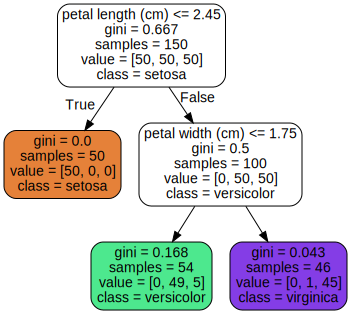

In [ ]:
from graphviz import Source

Source.from_file("iris_tree.dot")

In [ ]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [ ]:
tree_clf.predict([[5, 1.5]]).round(3)

array([1])

**Regularization**

In [ ]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [ ]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
print(tree_clf1.score(X_moons_test, y_moons_test))
print(tree_clf2.score(X_moons_test, y_moons_test))

0.898
0.92


# Regression

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

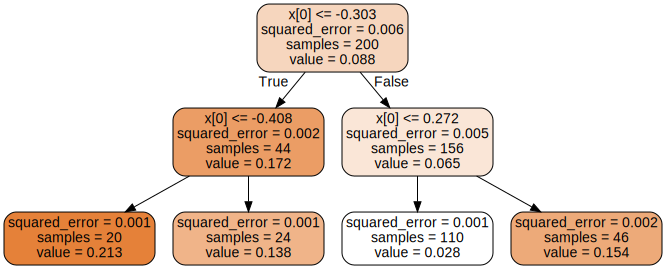

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_reg,
    out_file="regression_tree.dot",
    class_names="x1",
    rounded=True,
    filled=True
)
Source.from_file("regression_tree.dot")

**Adding PCA for Sensitivity to Axis Orientation**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

**Exercises**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_moons, y_moons = make_moons(n_samples=10000, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

parameters = {
    'max_leaf_nodes':[10, 25, 50, 75],
    'min_samples_leaf':[50, 75, 100, 125,150]
    }
grid_tree = GridSearchCV(DecisionTreeClassifier(), parameters)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [10, 25, 50, 75],
                         'min_samples_leaf': [50, 75, 100, 125, 150]})

In [ ]:
print(grid_tree.best_params_)
grid_tree.score(X_test, y_test)

{'max_leaf_nodes': 50, 'min_samples_leaf': 50}


0.8595

In [ ]:
from sklearn.model_selection import ShuffleSplit
